<a href="https://colab.research.google.com/github/Hemasaiganesh/SPAM-Detection/blob/NLP_LAB_PROJECT_(1).ipynb/NLP_LAB_PROJECT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2" : "text", "v1":"label"})

In [ ]:
data[1990:2000]

,label,text
1990,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...
1991,ham,No other Valentines huh? The proof is on your ...
1992,spam,Free tones Hope you enjoyed your new content. ...
1993,ham,Eh den sat u book e kb liao huh...
1994,ham,Have you been practising your curtsey?
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."
1999,ham,LMAO where's your fish memory when I need it?


In [ ]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


array([[<Axes: title={'center': 'length'}>]], dtype=object)

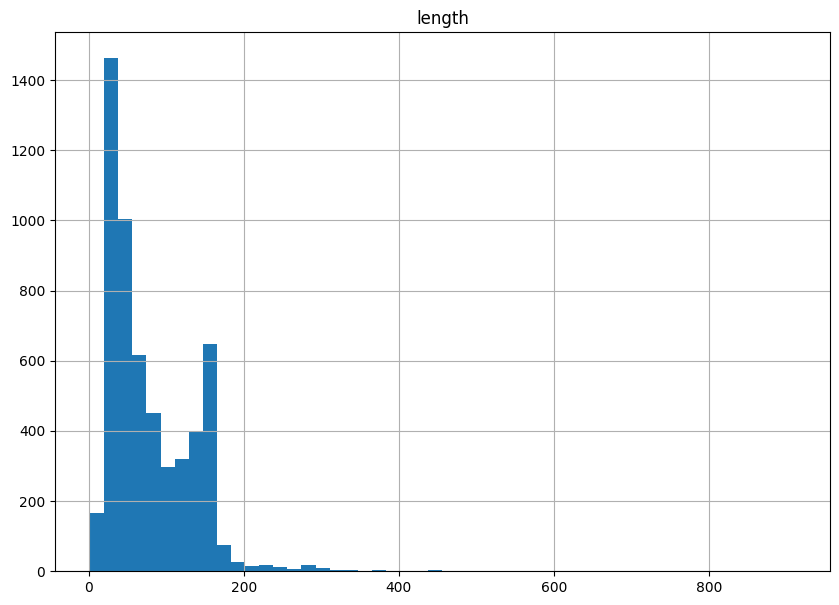

In [ ]:
data['length'] = data['text'].map(lambda x: len(x))
data.hist(column='length',bins=50, figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

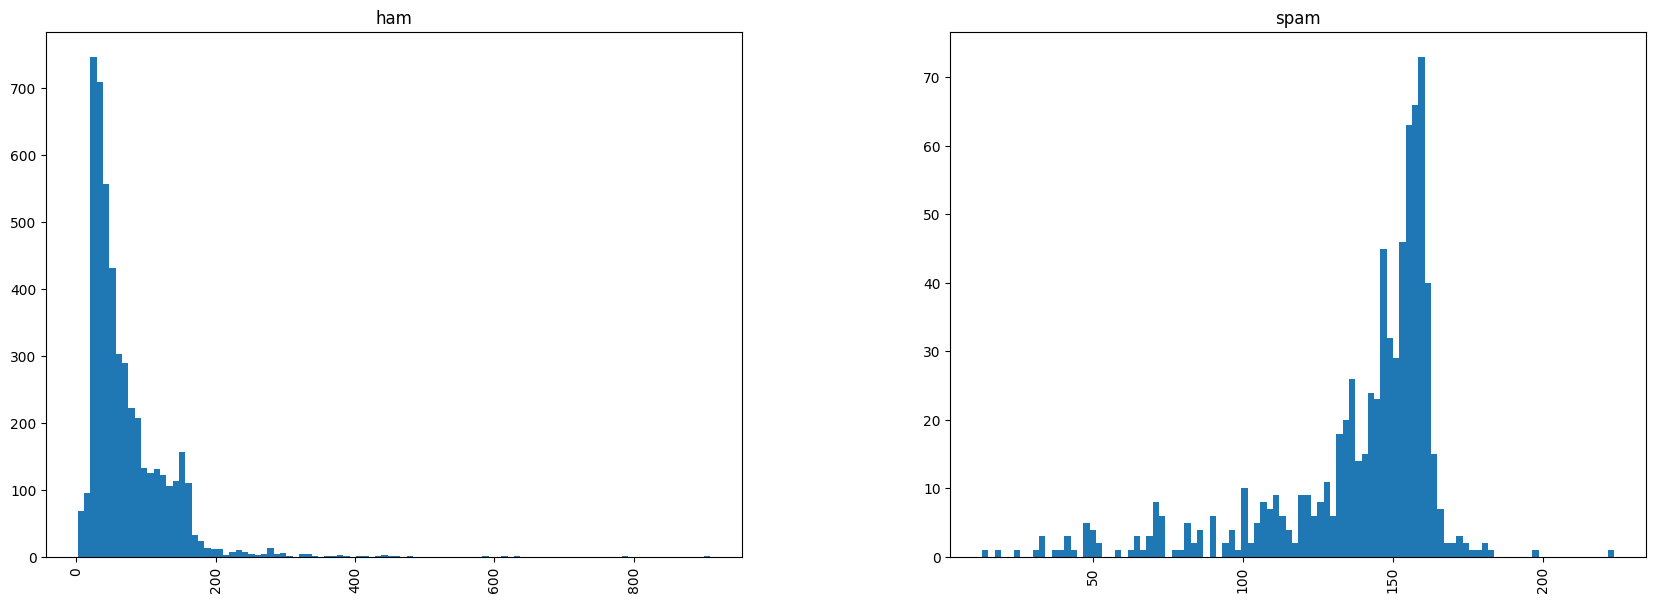

In [ ]:
data.hist(column='length', by='label', bins=100, figsize=(20,7))

In [ ]:
import nltk
nltk.download('punkt_tab') # Download the 'punkt_tab' data package.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
ham_words = ''
spam_words = ''

In [ ]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [ ]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

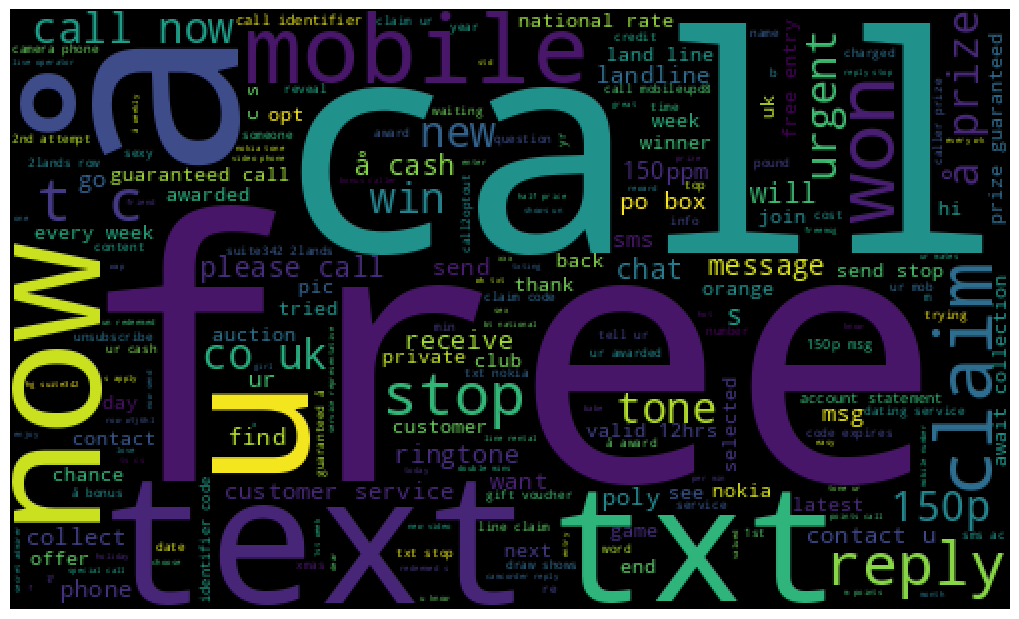

In [ ]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data = data.replace(['ham','spam'],[0, 1])

In [ ]:
data.head(10)

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [ ]:
import string
nltk.download('stopwords')
def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['text'] = data['text'].apply(text_process)

In [ ]:
data.head()

,label,text,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


In [ ]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [ ]:
## Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  11305


In [ ]:
## Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['u', '2', 'call', 'U', 'get', 'Im', 'ur', '4', 'ltgt', 'know', 'go', 'like', 'dont', 'come', 'got', 'time', 'day', 'want', 'Ill', 'lor', 'Call', 'home', 'send', 'going', 'one', 'need', 'Ok', 'good', 'love', 'back', 'n', 'still', 'text', 'im', 'later', 'see', 'da', 'ok', 'think', 'Ì', 'free', 'FREE', 'r', 'today', 'Sorry', 'week', 'phone', 'mobile', 'cant', 'tell', 'take', 'much', 'night', 'way', 'Hey', 'reply', 'work', 'make', 'give', 'new']


In [ ]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [ ]:
### Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [ ]:
## Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])

In [ ]:
word_vectors.shape

(5572, 11305)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5572, 9376)

In [ ]:
#features = word_vectors
features = vectors

In [ ]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4736, 9376)
(836, 9376)
(4736,)
(836,)


In [ ]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'error'
params['eta'] = 0.02
params['max_depth'] = 10

d_train = xgb.DMatrix(X_train, label=y_train)

watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=400, verbose_eval=10)

[0]	train-error:0.13429
[10]	train-error:0.13429
[20]	train-error:0.13429
[30]	train-error:0.06398
[40]	train-error:0.04645
[50]	train-error:0.03948
[60]	train-error:0.03568
[70]	train-error:0.03294
[80]	train-error:0.03209
[90]	train-error:0.02935
[100]	train-error:0.02639
[110]	train-error:0.02534
[120]	train-error:0.02449
[130]	train-error:0.02407
[140]	train-error:0.02407
[150]	train-error:0.02407
[160]	train-error:0.02365
[170]	train-error:0.02280
[180]	train-error:0.02196
[190]	train-error:0.02069
[200]	train-error:0.02006
[210]	train-error:0.01879
[220]	train-error:0.01879
[230]	train-error:0.01858
[240]	train-error:0.01816
[250]	train-error:0.01816
[260]	train-error:0.01753
[270]	train-error:0.01753
[280]	train-error:0.01689
[290]	train-error:0.01689
[300]	train-error:0.01605
[310]	train-error:0.01626
[320]	train-error:0.01626
[330]	train-error:0.01562
[340]	train-error:0.01562
[350]	train-error:0.01520
[360]	train-error:0.01499
[370]	train-error:0.01499
[380]	train-error:0.014

In [ ]:
from sklearn.metrics import accuracy_score

# Predict values for test set
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

# Apply function round() to each element in np array
# so predictions are all either 0 or 1.
npround = np.vectorize(round)
p_test_ints = npround(p_test)

# Error rate for test set
accuracy = accuracy_score(y_test, p_test_ints)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.972488038277512


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [ ]:
clfs = {'Support Vector Classifier' : svc,'K-Nearest Neignbours' : knc, 'Naive Bayes Classifier': mnb, 'Decision Tree Classifier': dtc, 'Logistic Regression': lrc, 'Random Forest': rfc}

In [ ]:
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [ ]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [ ]:
predictions = pd.DataFrame(pred_scores_word_vectors, columns=['Classifier', 'Score'])
predictions = predictions.set_index('Classifier')
predictions

,Score
Classifier,
Support Vector Classifier,[0.9784688995215312]
K-Nearest Neignbours,[0.9330143540669856]
Naive Bayes Classifier,[0.9880382775119617]
Decision Tree Classifier,[0.9605263157894737]
Logistic Regression,[0.9533492822966507]
Random Forest,[0.9796650717703349]


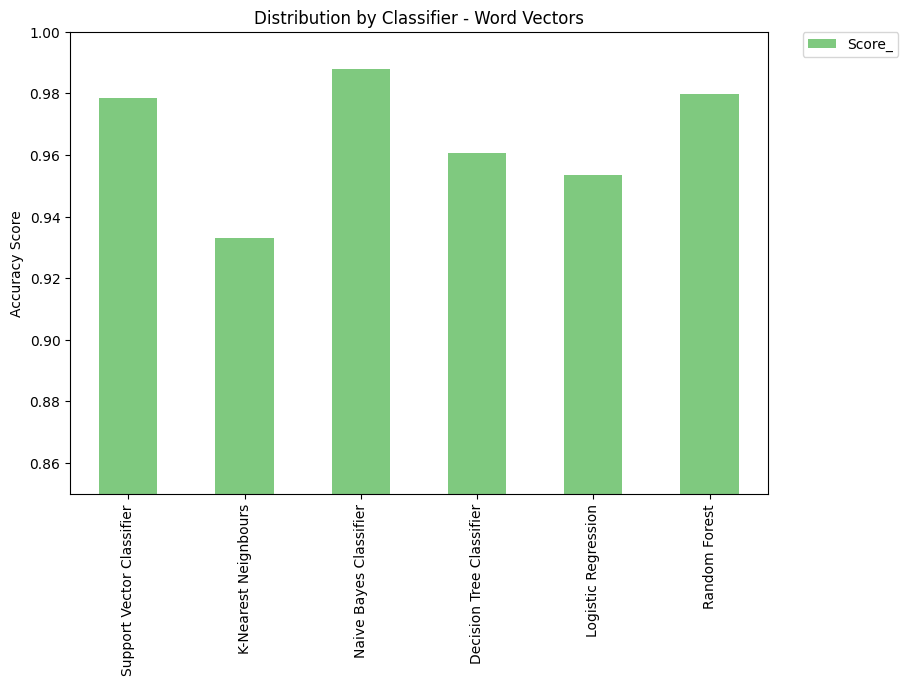

In [ ]:
predictions_word_vectors.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions_word_vectors.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier - Word Vectors')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [ ]:
text = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(text)

In [ ]:
p = mnb.predict(integers)[0]
find(p)

Message is SPAM


In [ ]:
import joblib

joblib.dump(mnb, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")

Best Model (Naive Bayes) Saved


In [ ]:
best = joblib.load('best.pkl')

In [ ]:
best

MultinomialNB(alpha=0.2)

In [ ]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'best.pkl' contains your trained model
best = joblib.load('best.pkl')

# Recreate the TfidfVectorizer with the same parameters as before
vectorizer = TfidfVectorizer()  # You might need to specify parameters like vocabulary, etc.

# Fit the vectorizer if needed
# Example: If you have the original data, you can refit using:
# vectorizer.fit(data['text'])
# Where 'data' is your original DataFrame with the 'text' column

# Define your texts
text1 = ["Free tones Hope you enjoyed your new content"]
text2 = ["That I'll call later"]
text3 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text4 = ["WINNER!! You just won a free ticket to Bahamas. Send your Details"]

# Transform the texts
integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)

FileNotFoundError: [Errno 2] No such file or directory: 'best.pkl'

In [ ]:
p1 = best.predict(integers)[0]
p2 = best.predict(integers)[0]
p3 = best.predict(integers)[0]
p4 = best.predict(integers)[0]

find(p1)
find(p2)
find(p3)
find(p4)

Message is SPAM
Message is SPAM
Message is SPAM
Message is SPAM


In [ ]:
!echo "# SPAM-Detection" >> README.md

SyntaxError: invalid syntax (ipython-input-2428700904.py, line 1)